In [1476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1477]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1478]:
df.shape

(768, 9)

In [1479]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [1480]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [1481]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1482]:
df.duplicated().sum()

np.int64(0)

INVALID VALUES CHECKING

In [1483]:
numcols = df.select_dtypes(include=['number']).columns 
print((df[numcols] < 0).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [1484]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


OUTLIERS DETECTION

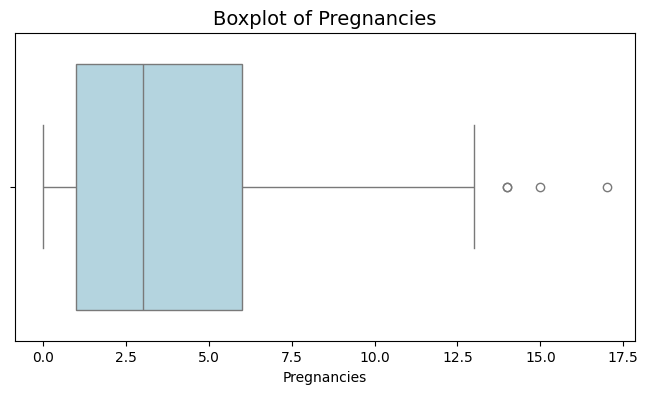

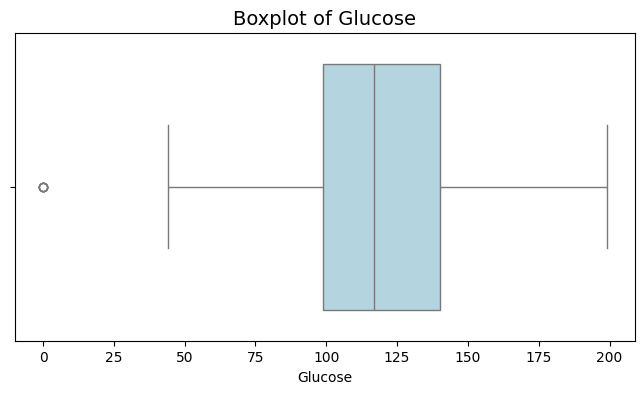

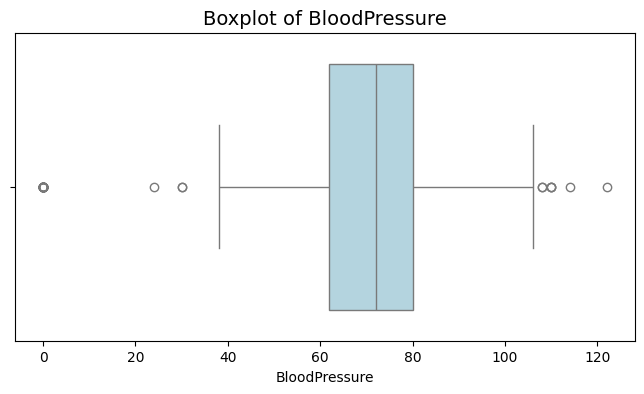

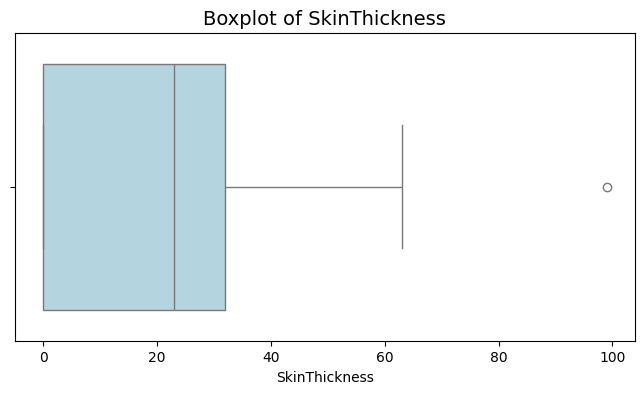

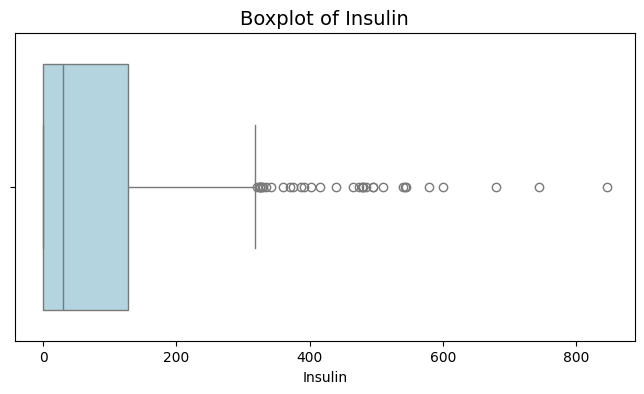

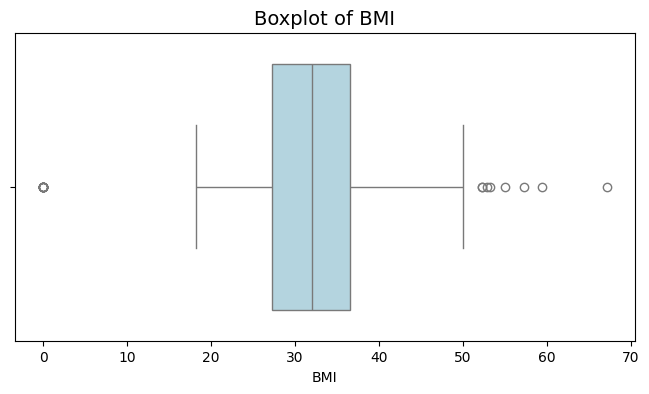

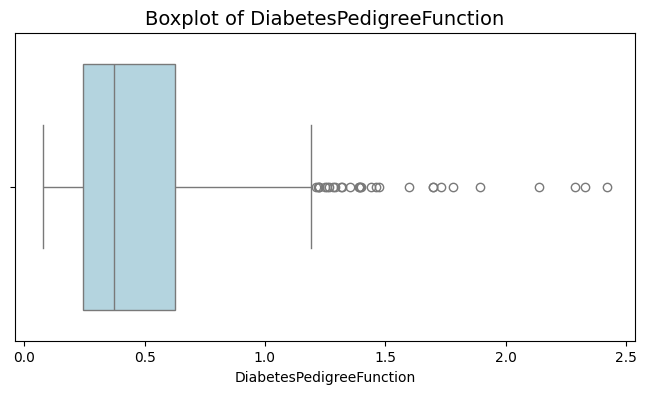

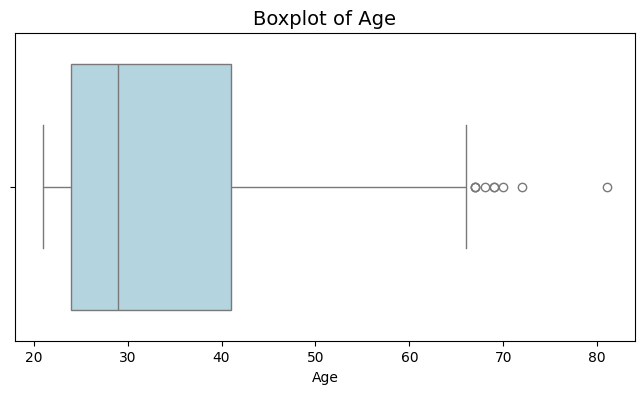

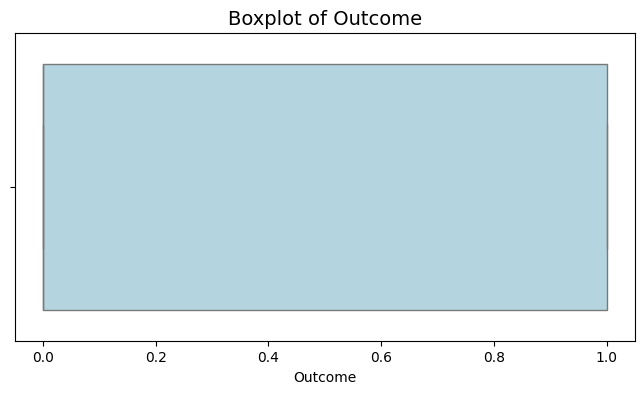

In [1485]:
for col in numcols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)

OUTLIERS COUNTING

In [1486]:
for col in numcols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f"Column '{col}' has {count} outliers")

Column 'Pregnancies' has 4 outliers
Column 'Glucose' has 5 outliers
Column 'BloodPressure' has 45 outliers
Column 'SkinThickness' has 1 outliers
Column 'Insulin' has 34 outliers
Column 'BMI' has 19 outliers
Column 'DiabetesPedigreeFunction' has 29 outliers
Column 'Age' has 9 outliers
Column 'Outcome' has 0 outliers


OUTLIERS REMOVAL

In [1487]:
for col in numcols:
    df[col] = df[col].clip(lower, upper)

INVALID VALUES COUNTING

In [1488]:
zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print((df[zero_as_missing] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


REPLACING INVALID VALUES WITH MEDIAN

In [1489]:
for col in zero_as_missing:
    df[col]=df[col].replace(0,df[col].median())
print((df[zero_as_missing] == 0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


Pregnancies :-0.9722837770971761
Glucose :0.0
BloodPressure :0.0
SkinThickness :0.0
Insulin :0.0
BMI :0.0
DiabetesPedigreeFunction :1.919911066307204
Age :0.0
Outcome :0.635016643444986


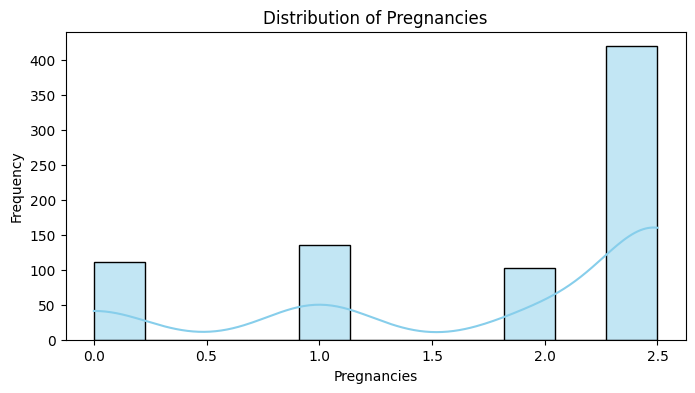

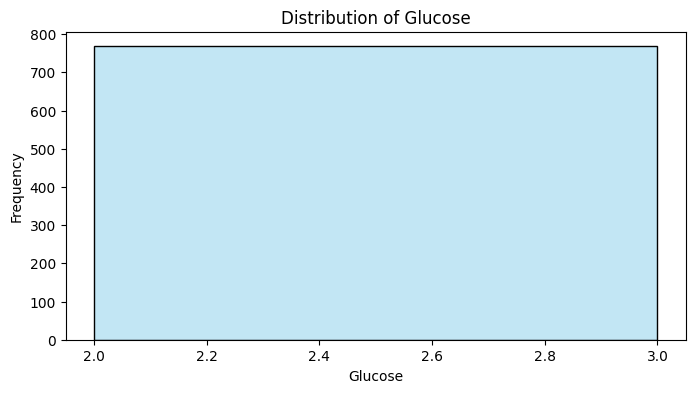

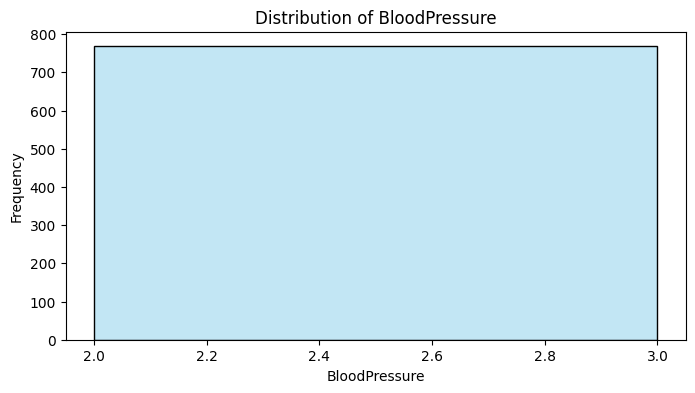

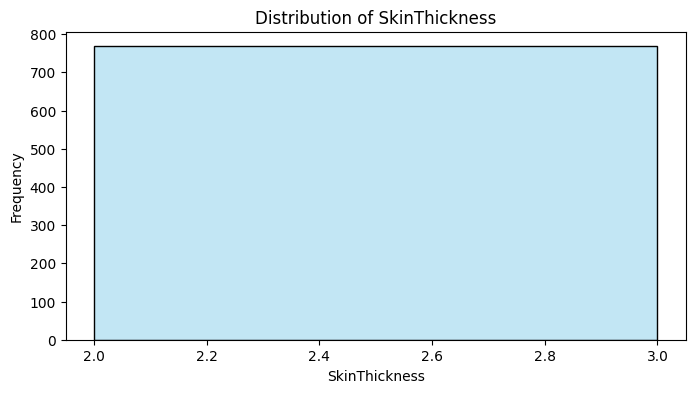

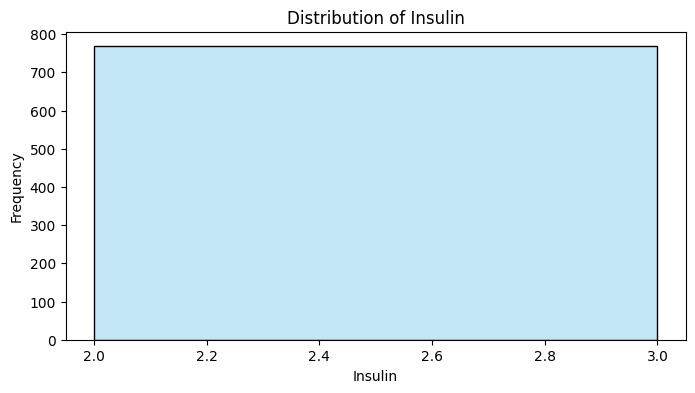

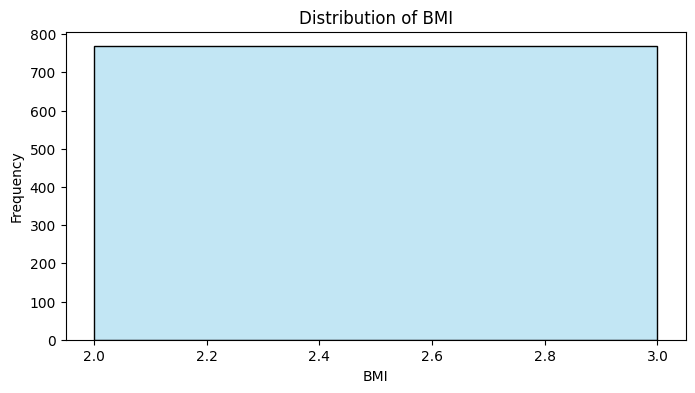

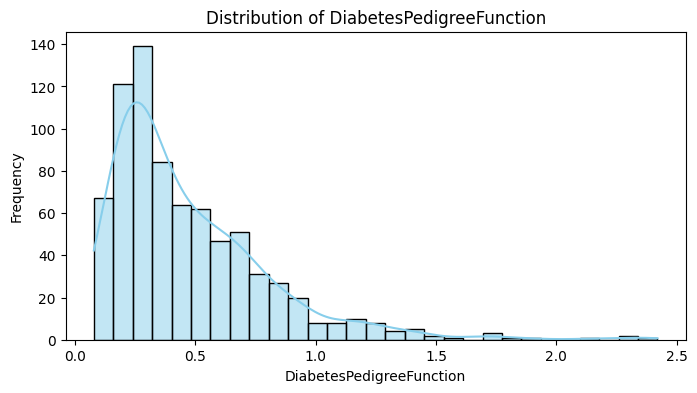

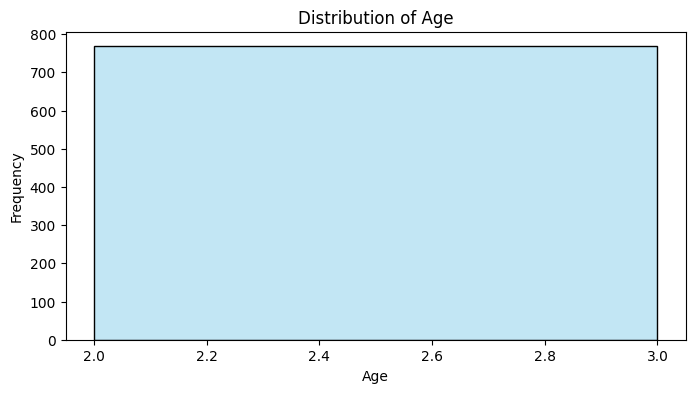

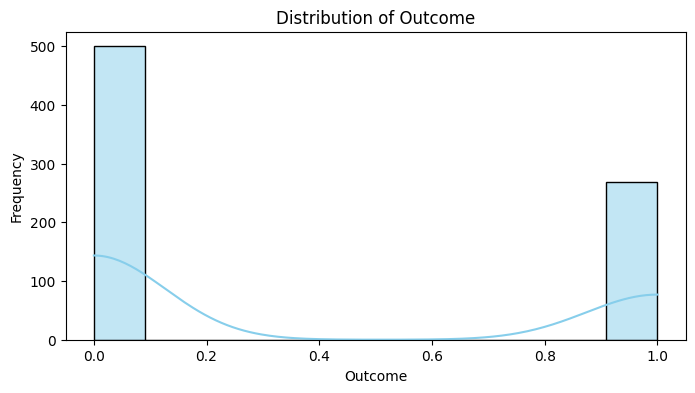

In [1490]:
for col in numcols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    print(f"{col} :{df[col].skew()}")

UNIVARIANT , BIVARIANT , MULTIVARIANT ANALYSIS

([<matplotlib.axis.XTick at 0x1fed0e88af0>,
 [Text(0.0, 0, '0.0'),
  Text(1.0, 0, '1.0'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5')])

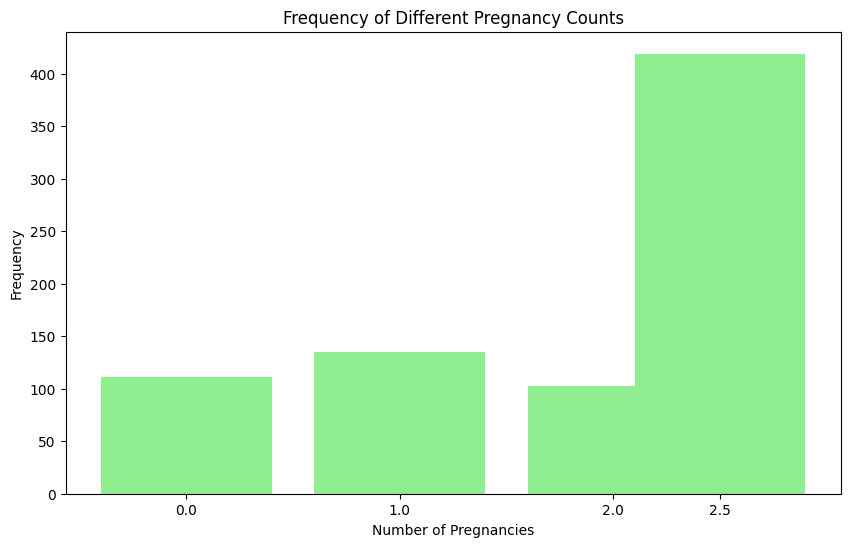

In [1491]:
preg_counts = df['Pregnancies'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(preg_counts.index, preg_counts.values, color='lightgreen')
plt.xlabel("Number of Pregnancies")
plt.ylabel("Frequency")
plt.title("Frequency of Different Pregnancy Counts")
plt.xticks(preg_counts.index)

Text(0.5, 1.0, 'Count of Diabetic and Non-Diabetic Patients')

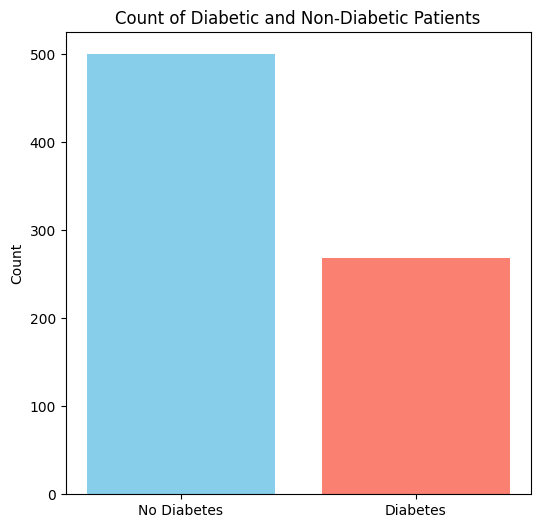

In [1492]:
counts = df['Outcome'].value_counts()  
plt.figure(figsize=(6,6))
plt.bar(['No Diabetes','Diabetes'], counts.values, color=['skyblue','salmon'])
plt.ylabel("Count")
plt.title("Count of Diabetic and Non-Diabetic Patients")

Text(0.5, 1.0, 'Correlation Heatmap')

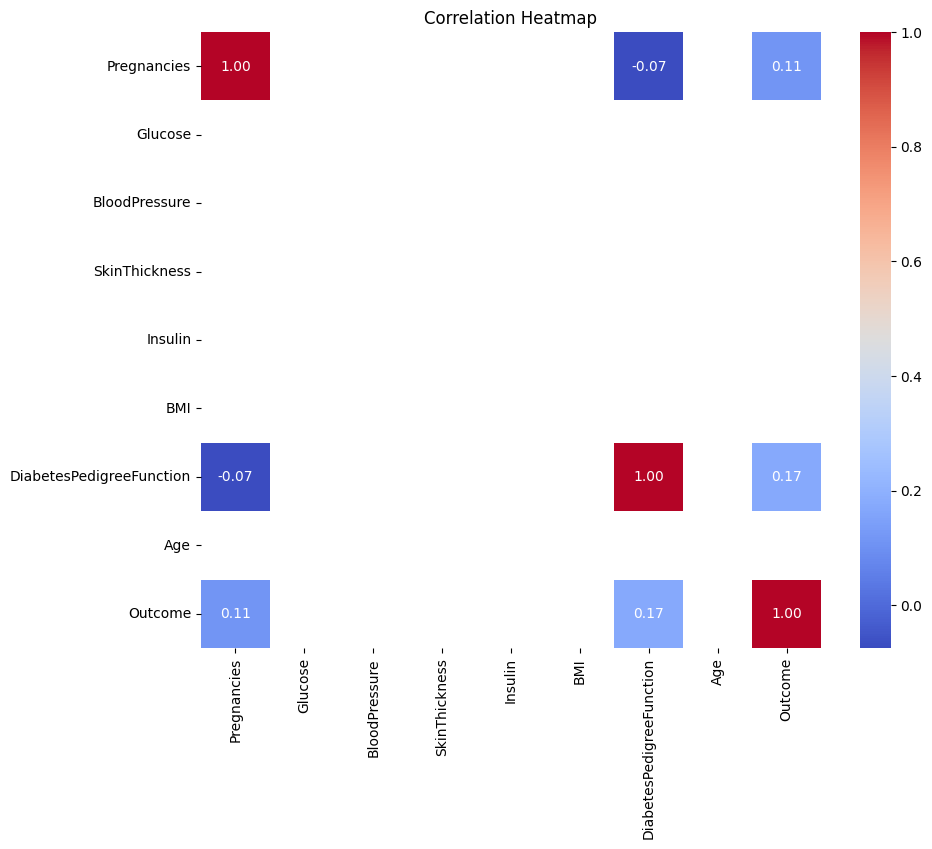

In [1493]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")

TRANSFORMING THE SKEWNESS

In [1494]:
from sklearn.preprocessing import PowerTransformer
cols_to_transform = ["Pregnancies", "DiabetesPedigreeFunction"]
pt = PowerTransformer(method='yeo-johnson')
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])

In [1495]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

SPLIT DATA INTO TRAIN AND TEST

In [1496]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [1497]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TRAIN A MODEL

In [1498]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score ,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

LOGISTIC MODEL

In [1499]:
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred_lo = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lo))
print("Precision:", precision_score(y_test, y_pred_lo))
print("Recall:", recall_score(y_test, y_pred_lo))
print("F1 Score:", f1_score(y_test, y_pred_lo))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lo))

Accuracy: 0.5974025974025974
Precision: 0.4375
Recall: 0.5185185185185185
F1 Score: 0.4745762711864407
Confusion Matrix:
 [[64 36]
 [26 28]]


DECISION TREE MODEL

BEFORE TUNING

In [1500]:
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.5974025974025974
Precision: 0.4230769230769231
Recall: 0.4074074074074074
F1 Score: 0.41509433962264153
Confusion Matrix:
 [[70 30]
 [32 22]]


AFTER TUNING

In [1501]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 15, 20],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5,    
    n_jobs=-1
)
grid_search.fit(X_train, y_train) 

print("Best Hyperparameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

Best Hyperparameters:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}


In [1502]:
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Accuracy: 0.6103896103896104
Precision: 0.4642857142857143
Recall: 0.7222222222222222
F1 Score: 0.5652173913043478
Confusion Matrix:
 [[55 45]
 [15 39]]


RANDOM FOREST

BEFORE TUNING

In [1503]:
model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.6168831168831169
Precision: 0.45098039215686275
Recall: 0.42592592592592593
F1 Score: 0.4380952380952381
Confusion Matrix:
 [[72 28]
 [31 23]]


AFTER TUNING

In [1504]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = {
    'n_estimators': randint(low=100, high=500),
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': randint(low=1, high=10),
    'max_features': [1.0, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,      
    scoring='balanced_accuracy',    
    cv=5,         
    random_state=42,
    n_jobs=-1       
)

random_search.fit(X_train, y_train)

best_params_rf = random_search.best_params_
best_model_rf = random_search.best_estimator_

print("Best Hyperparameters:")
print(best_params_rf)

Best Hyperparameters:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 312}


In [1505]:
y_pred_tuned_rf = best_model_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tuned_rf))
print("Precision:", precision_score(y_test, y_pred_tuned_rf))
print("Recall:", recall_score(y_test, y_pred_tuned_rf))
print("F1 Score:", f1_score(y_test, y_pred_tuned_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_rf))

Accuracy: 0.6233766233766234
Precision: 0.46153846153846156
Recall: 0.4444444444444444
F1 Score: 0.4528301886792453
Confusion Matrix:
 [[72 28]
 [30 24]]


KNN

BEFORE TUNING

In [1506]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train) 
y_pred_knn = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.551948051948052
Precision: 0.32558139534883723
Recall: 0.25925925925925924
F1 Score: 0.28865979381443296
Confusion Matrix:
 [[71 29]
 [40 14]]


AFTER TUNING

In [1507]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='precision',       
    cv=5,              
    n_jobs=-1
)
grid_search_knn.fit(X_train_scaled, y_train) 
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_
y_pred_tuned_knn = best_model_knn.predict(X_test_scaled)

print("Best HyperparameterS:")
print(best_params_knn)

Best HyperparameterS:
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [1508]:
print("Best Parameters:", best_params_knn)
print("\nAccuracy:", accuracy_score(y_test, y_pred_tuned_knn))
print("Precision:", precision_score(y_test, y_pred_tuned_knn))
print("Recall:", recall_score(y_test, y_pred_tuned_knn))
print("F1 Score:", f1_score(y_test, y_pred_tuned_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_knn))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

Accuracy: 0.6168831168831169
Precision: 0.41379310344827586
Recall: 0.2222222222222222
F1 Score: 0.2891566265060241
Confusion Matrix:
 [[83 17]
 [42 12]]


SVC

BEFORE TUNING

In [1509]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)
y_pred_svc = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.6948051948051948
Precision: 0.7058823529411765
Recall: 0.2222222222222222
F1 Score: 0.3380281690140845
Confusion Matrix:
 [[95  5]
 [42 12]]


AFTER TUNING

In [1510]:
param_grid_svc = {
    'C': [50,75,100,125,150],
    'gamma': [0.05, 0.1, 0.15,0.2,1],
    'class_weight': ['balanced'],
    'kernel': ['rbf']
}
grid_search_svc = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svc,
    scoring='f1', 
    cv=5,         
    n_jobs=-1
)
grid_search_svc.fit(X_train_scaled, y_train) 
best_params_svc = grid_search_svc.best_params_
best_model_svc = grid_search_svc.best_estimator_

print("Best Hyperparameters Found:")
print(best_params_svc)

y_pred_tuned_svc = best_model_svc.predict(X_test_scaled)

Best Hyperparameters Found:
{'C': 50, 'class_weight': 'balanced', 'gamma': 0.05, 'kernel': 'rbf'}


In [1511]:
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_svc))
print("Precision:", precision_score(y_test, y_pred_tuned_svc))
print("Recall:", recall_score(y_test, y_pred_tuned_svc))
print("F1 Score:", f1_score(y_test, y_pred_tuned_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_svc))

Accuracy: 0.6623376623376623
Precision: 0.5125
Recall: 0.7592592592592593
F1 Score: 0.6119402985074627
Confusion Matrix:
 [[61 39]
 [13 41]]


XGBOOST

BEFORE TUNING

In [1512]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred_xg = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Precision:", precision_score(y_test, y_pred_xg))
print("Recall:", recall_score(y_test, y_pred_xg))
print("F1 Score:", f1_score(y_test, y_pred_xg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xg))

Accuracy: 0.5909090909090909
Precision: 0.36363636363636365
Recall: 0.2222222222222222
F1 Score: 0.27586206896551724
Confusion Matrix:
 [[79 21]
 [42 12]]


c:\Users\durka\anaconda3\envs\edafeature_rain\lib\site-packages\xgboost\training.py:199: UserWarning: [16:09:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AFTER TUNING

In [1513]:
param_distributions_xgb = {
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1,2, 5, 8,10, 25,16] 
}
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_distributions_xgb,
    n_iter=50,     
    scoring='f1',   
    cv=5,            
    random_state=42,
    n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)
best_params_xgb = random_search_xgb.best_params_
best_model_xgb = random_search_xgb.best_estimator_
print("Best Hyperparameters Found:")
print(best_params_xgb)

y_pred_tuned_xgb = best_model_xgb.predict(X_test)

Best Hyperparameters Found:
{'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 484, 'scale_pos_weight': 5, 'subsample': 0.8}


c:\Users\durka\anaconda3\envs\edafeature_rain\lib\site-packages\xgboost\training.py:199: UserWarning: [16:09:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [1514]:
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_xgb))
print("Precision:", precision_score(y_test, y_pred_tuned_xgb))
print("Recall:", recall_score(y_test, y_pred_tuned_xgb))
print("F1 Score:", f1_score(y_test, y_pred_tuned_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_xgb))

Accuracy: 0.44805194805194803
Precision: 0.376
Recall: 0.8703703703703703
F1 Score: 0.5251396648044693
Confusion Matrix:
 [[22 78]
 [ 7 47]]
